# Amazon sentiment analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import plotly.express as px
import seaborn as sns


In [2]:
df=pd.read_csv(r'C:\Users\Sabin Sapkota\Desktop\amazon\Reviews.csv')
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [6]:
df.shape

(568454, 10)

In [8]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [9]:
df.dtypes

Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

In [10]:
df.isna().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [3]:
df['helpfull%']=np.where(df['HelpfulnessDenominator']>0,df.HelpfulnessNumerator/df.HelpfulnessDenominator,-1)

In [4]:
df['%upvote']=pd.cut(df['helpfull%'],bins=[-1,0,0.2,0.4,0.6,0.8,1],labels=['empty','0-20%','20-40%','40-60%','60-80%','80-100%'])

# Analyse upvotes for different score ?

In [16]:
df.groupby(['Score','%upvote']).agg('count')

Id  ProductId  UserId  ProfileName  HelpfulnessNumerator  \
Score %upvote                                                                 
1     empty      8060       8060    8060         8060                  8060   
      0-20%      2338       2338    2338         2338                  2338   
      20-40%     4649       4649    4649         4649                  4649   
      40-60%     6586       6586    6586         6586                  6586   
      60-80%     5838       5838    5838         5836                  5838   
      80-100%   12531      12531   12531        12531                 12531   
2     empty      4234       4234    4234         4234                  4234   
      0-20%       762        762     762          762                   762   
      20-40%     1618       1618    1618         1618                  1618   
      40-60%     3051       3051    3051         3051                  3051   
      60-80%     2486       2486    2486         2486                  2486   
      80-100%    7014       7014    7014         7014                  7014   
3     empty      5062       5062    5062         5062                  5062   
      0-20%       474        474     474          474                   474   
      20-40%     1506       1506    1506         1506                  1506   
      40-60%     3384       3384    3384         3384                  3384   
      60-80%     2754       2754    2754         2754                  2754   
      80-100%   11037      11037   11037        11037                 11037   
4     empty      4780       4780    4780         4780                  4780   
      0-20%       116        116     116          116                   116   
      20-40%      909        909     909          909                   909   
      40-60%     3185       3185    3185         3185                  3185   
      60-80%     2941       2941    2941         2941                  2941   
      80-100%   26707      26707   26707        26707                 26707   
5     empty     11638      11638   11638        11638                 11638   
      0-20%       432        432     432          432                   432   
      20-40%     2275       2275    2275         2275                  2275   
      40-60%    10312      10312   10312        10312                 10312   
      60-80%    11060      11060   11060        11060                 11060   
      80-100%  140661     140661  140661       140659                140661   

               HelpfulnessDenominator    Time  Summary    Text  helpfull%  
Score %upvote                                                              
1     empty                      8060    8060     8060    8060       8060  
      0-20%                      2338    2338     2338    2338       2338  
      20-40%                     4649    4649     4649    4649       4649  
      40-60%                     6586    6586     6586    6586       6586  
      60-80%                     5838    5838     5838    5838       5838  
      80-100%                   12531   12531    12531   12531      12531  
2     empty                      4234    4234     4234    4234       4234  
      0-20%                       762     762      737     762        762  
      20-40%                     1618    1618     1618    1618       1618  
      40-60%                     3051    3051     3051    3051       3051  
      60-80%                     2486    2486     2486    2486       2486  
      80-100%                    7014    7014     7014    7014       7014  
3     empty                      5062    5062     5062    5062       5062  
      0-20%                       474     474      474     474        474  
      20-40%                     1506    1506     1506    1506       1506  
      40-60%                     3384    3384     3384    3384       3384  
      60-80%                     2754    2754     2754    2754       2754  
      80-100%                   11037   11037 

In [5]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [6]:
df['Score'].unique()

array([5, 1, 4, 2, 3], dtype=int64)

In [5]:
df1=df[df['Score']!=3]  # filtering 3  as it is neutral
df1.sample(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpfull%,%upvote
256602,256603,B003JA5KBW,A1KXJCXS6HFRQZ,Eric S. Olstad,0,0,4,1296432000,Great vitamin pack alternative,I usually look to Emergen-C for a quick vitami...,-1.000000,NaN
471623,471624,B000CSBVOO,A133XHNZVQYAME,Reader,8,9,5,1162512000,Zero Transfat,To the other reviewers who were freaking out a...,0.888889,80-100%


In [6]:
X=df1['Text']
y=df1.Score

In [7]:
y_dict={1:0,2:0,4:1,5:1}  # mapping 1,2 to zero and 4,5 to 1.
df1['Score']=df1['Score'].map(y_dict)

<ipython-input-7-cb0253a32b18>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Score']=df1['Score'].map(y_dict)


In [8]:
y=df1.Score  # dependent variable

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer(stop_words='english')

In [10]:
X_t=tf.fit_transform(X)

In [11]:
X_t.shape

(525814, 114969)

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_t,y,test_size=.2,random_state=42,shuffle=True)

In [13]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [14]:
lg.fit(X_train,y_train)


C:\Users\Sabin Sapkota\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
lg.score(X_train,y_train) #train score

0.9417284161929961

In [16]:
lg.score(X_test,y_test)  # test score

0.9356998183771859

In [19]:
ml=tf.get_feature_names()

In [17]:
lg.coef_.tolist()[0]

[-1.804581953690593,
 0.17305454273765697,
 0.49755071924833344,
 -0.07039547896773181,
 -0.029379470746121277,
 -0.038197563109320015,
 0.0,
 -0.04376387121009479,
 0.011983421544646738,
 0.0031528981403349285,
 0.008079776103657824,
 -0.08076895385299454,
 0.010150888776883879,
 0.08428567202338168,
 -0.25343916025079544,
 0.018405251788438257,
 0.010581782028151758,
 0.0,
 0.005565977124073206,
 0.009076514694552909,
 0.0057701607674022545,
 0.04964911363695034,
 0.03142604629276632,
 0.03142604629276632,
 0.03142604629276632,
 0.03142604629276632,
 0.03142604629276632,
 0.03142604629276632,
 0.03142604629276632,
 0.03142604629276632,
 0.03142604629276632,
 -0.008374985245172852,
 0.03677079746726157,
 0.0023993698713250357,
 -0.11131416489227003,
 -0.009431726839828337,
 0.0021845594420766895,
 0.01756524815510021,
 0.08234156315086909,
 0.0016449247076482916,
 -0.03058896472082081,
 0.017471080299244646,
 0.005118040571361659,
 0.036491260034421935,
 -0.0651632181187657,
 0.000337

In [20]:
df_coeff=pd.DataFrame({'word':ml,'coefficient':lg.coef_.tolist()[0]})
df_coeff

,word,coefficient
0,00,-1.804582
1,000,0.173055
2,0000,0.497551
3,000001,-0.070395
4,00001,-0.029379
...,...,...
114964,çaykur,0.003489
114965,çelem,-0.073346
114966,être,0.034716
114967,île,0.039794


In [23]:
# top  10  positive words  
df_coeff.sort_values(by='coefficient',ascending=False)['word'].head(10)

51300         great
35641     delicious
20308          best
78889       perfect
43222     excellent
65108         loves
54309        highly
112883    wonderful
65072          love
7821        amazing
Name: word, dtype: object

In [24]:
# top  10 negative words
df_coeff.sort_values(by='coefficient',ascending=False)['word'].tail(10)

88350             return
103640             threw
107553     unfortunately
55168           horrible
37556       disappointed
11000              awful
37563     disappointment
102845          terrible
37560      disappointing
113164             worst
Name: word, dtype: object

In [53]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print(classification_report(lg.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.70      0.86      0.77     13225
           1       0.98      0.95      0.96     91938

    accuracy                           0.94    105163
   macro avg       0.84      0.90      0.87    105163
weighted avg       0.94      0.94      0.94    105163



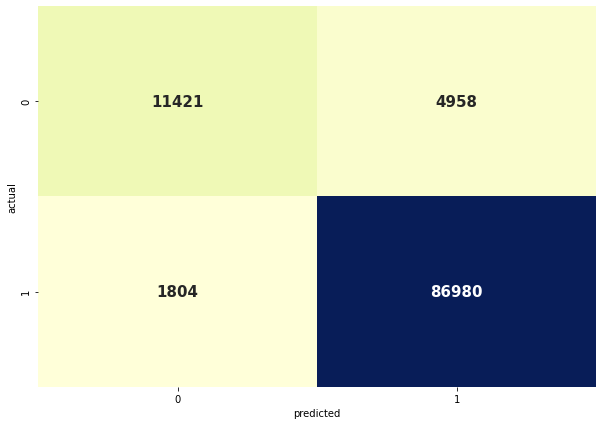

In [54]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,lg.predict(X_test)),annot=True,fmt='d',cmap="YlGnBu",
            cbar=False,annot_kws={'fontweight':'bold','size':15})
plt.xlabel('predicted')
plt.ylabel('actual');

# Evaluating model on the basis of upvote

In [59]:
df['%upvote'].unique()

['80-100%', NaN, '60-80%', 'empty', '40-60%', '20-40%', '0-20%']
Categories (6, object): ['empty' < '0-20%' < '20-40%' < '40-60%' < '60-80%' < '80-100%']

In [64]:
data=df[df['%upvote'].isin(['80-100%', '60-80%', '20-40%', '0-20%'])]  # removing neutral,40-60%
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,helpfull%,%upvote
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,80-100%
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,80-100%
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,80-100%
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.0,80-100%
10,11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5,1107820800,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,1.0,80-100%


In [65]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'helpfull%', '%upvote'],
      dtype='object')

In [66]:
data['%upvote'].unique()  

['80-100%', '60-80%', '20-40%', '0-20%']
Categories (4, object): ['0-20%' < '20-40%' < '60-80%' < '80-100%']

In [67]:
my_dict={'80-100%':1, '60-80%':1, '20-40%':0, '0-20%':0}

In [68]:
data['%upvote']=df['%upvote'].map(my_dict)

<ipython-input-68-538eb7cf3c3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['%upvote']=df['%upvote'].map(my_dict)


In [71]:
y=data['%upvote']

In [72]:
y.value_counts()

1.0    223029
0.0     15079
Name: %upvote, dtype: int64

In [75]:
X_s=tf.fit_transform(data['Text'])

# IMbalnce data handling

In [76]:
from imblearn.over_sampling import RandomOverSampler
rs= RandomOverSampler()

In [79]:
X,y=rs.fit_resample(X_s,y)

In [80]:
y.value_counts()  # data set is balanced

0.0    223029
1.0    223029
Name: %upvote, dtype: int64

# model building

In [82]:
from sklearn.model_selection import GridSearchCV
param={'C':10.0**np.arange(-3,2),'penalty':['l1','l2']}

In [84]:
gs=GridSearchCV(lg,cv=5,param_grid=param,verbose=1,)

In [85]:
gs.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


C:\Users\Sabin Sapkota\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Sabin Sapkota\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sabin Sapkota\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Sabin Sapkota\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Sabin Sapkota\Anaconda3\lib\

C:\Users\Sabin Sapkota\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Sabin Sapkota\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sabin Sapkota\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Sabin Sapkota\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Sabin Sapkota\Anaconda3\lib\

C:\Users\Sabin Sapkota\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sabin Sapkota\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

C:\Users\Sabin Sapkota\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Sabin Sapkota\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
                         'penalty': ['l1', 'l2']},
             verbose=1)

In [87]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42,shuffle=True)

In [88]:
gs.predict(X_test)

array([0., 0., 1., ..., 0., 1., 1.])

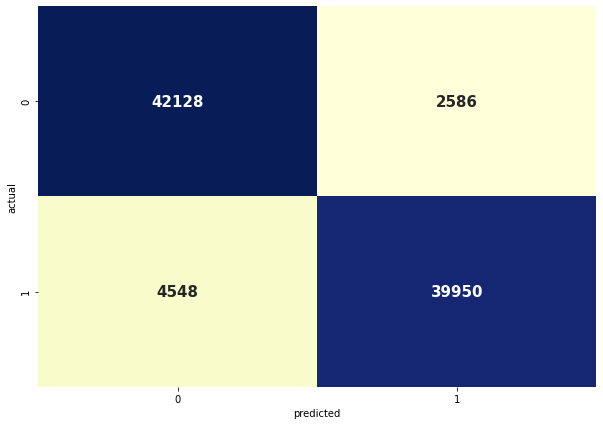

In [90]:
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test,gs.predict(X_test)),annot=True,fmt='d',cmap="YlGnBu",
            cbar=False,annot_kws={'fontweight':'bold','size':15})
plt.xlabel('predicted')
plt.ylabel('actual');

In [91]:
print(classification_report(gs.predict(X_test),y_test))

              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92     46676
         1.0       0.90      0.94      0.92     42536

    accuracy                           0.92     89212
   macro avg       0.92      0.92      0.92     89212
weighted avg       0.92      0.92      0.92     89212

